# **Práctica 6: Transformaciones**

<img src ="https://epigijon.uniovi.es/image/image_gallery?uuid=903ae5c8-b29b-430e-980d-1a19a885c736&groupId=3743853&t=1688576582973" width=300 px>

Este cuaderno desarrolla contenidos prácticos de la asignatura **Visión artificial** del Grado en Ciencia e Ingeniería de Datos.

***

In [1]:
import numpy as np
import skimage
import matplotlib.pyplot as plt
import scipy

# Implementación

La transformación geométrica en imágenes es un campo fundamental en el procesamiento de imágenes y la visión por computador, abordando la modificación de la posición, orientación y escala de objetos en una imagen. Estas transformaciones, como traslación, rotación y escalado, son cruciales para corregir distorsiones, alinear imágenes, realinear objetos y simular perspectivas. Estas operaciones permiten adaptar la geometría de las imágenes, facilitando diversas aplicaciones, desde la corrección de imperfecciones hasta la manipulación creativa de contenidos visuales.

Para realizar transformaciones en un espacio 2D a menudo es conveniente trabajar con coordenadas homogéneas. Las coordenadas homogéneas son una extensión del sistema de coordenadas euclidiano que facilita ciertas operaciones matriciales, como las utilizadas en transformaciones geométricas.

> Implementa una función para convertir puntos 2D a coordenadas homogéneas. Como entrada se reciben un array de tamaño $2 \times N$, donde $N$ es el número de puntos. La salida es un array de tamaño $3 \times N$ añadiendo una fila de unos.

> Implementa una función para convertir coordenadas homogéneas a puntos 2D. Como entrada se reciben un array de tamaño $3 \times N$, donde $N$ es el número de puntos. La salida es un array de tamaño $2 \times N$ tras dividir las dos primeras filas entre la tercera.

> Añade tests usando `np.testing.assert_allclose` para verificar el correcto funcionamiento de las funciones.

> Define un conjunto de puntos y verifica su transformación. Utiliza como ejemplo el siguiente [demostrador](https://iis.uibk.ac.at/public/piater/courses/demos/homography/homography.xhtml)

In [5]:
def de2D_coordenadas_homogeneas(a):
    if len(a)!=2:
        print("El array no tiene solamente dos filas")
        return
    N=a.shape[1]
    b=a.copy()
    homo= np.vstack((b, np.ones(N)))
    return homo

puntos_2d = np.array([[1, 2, 3],
                      [4, 5, 6]])
resultado_esperado=np.array([[1, 2, 3],
                      [4, 5, 6],
                      [1,1,1]])
coordenadas_homogeneas = de2D_coordenadas_homogeneas(puntos_2d)
bien_mal= np.testing.assert_allclose(resultado_esperado,coordenadas_homogeneas,atol=1e-8)
print(bien_mal)

None


In [6]:
def coordenadas_homogeneas_a2D(a):
    if len(a)!=3:
        print("El array no tiene solamente tres filas")
        return
    N=a.shape[1]
    b=a.copy()
    b[0]=b[0]/b[2]
    b[1]=b[1]/b[2]
    matriz = np.delete(b, 2, axis=0)
    return matriz


puntos_2d = np.array([[4, 8, 6],
                      [4, 10, 6],
                      [2, 2, 2]])
resultado_esperado=np.array([[2,4,3],[2,5,3]])
coordenadas_homogeneas = coordenadas_homogeneas_a2D(puntos_2d)
bien_mal= np.testing.assert_allclose(resultado_esperado,coordenadas_homogeneas,atol=1e-8)#comprobar que está bien. SE METE EL RETURN DE LA FUNCION Y LO QUE CRESS QUE TIENE QUE SALIR.
print(bien_mal)

None


> Implementa una función que permita realizar la transformación geométrica de una imagen `def transform_image(img, matrix)` siguiendo los siguientes pasos:

> Crea un array con las coordenadas de los límites de la imagen (esquina superior izquierda, derecha, etc.).
>
> Convierte el array a coordenadas homogéneas, realiza la transformación usando la multiplicación de matrices, y determina los límites mínimos y máximos de las esquinas transformadas.
>
> Crea un array de puntos entre los punto mínimo y máximo en cada eje usando `np.linspace`. El número de elementos se puede recibir como parámetro a la función de transformación.
>
> Crea un grid usando `np.meshgrid`.
>
> Transforma las coordenadas del grid usando la transformación inversa.
>
> Para cada canal de la imagen, reinterpola la imagen en las coordenadas transformadas usando `scipy.ndimage.map_coordinates`. Esta función recibe las coordenadas en este orden: primero las filas y luego las columnas.
>
> La función debe retornar la imagen transformada y las dimensiones (`[xmin, xmax, ymax, ymin]`)
>
> Visualiza la imagen usando `imshow(warped, extent=extent)`



In [7]:
import numpy as np
import skimage
from scipy.ndimage import map_coordinates
import matplotlib.pyplot as plt

dx = 100  # traslación en el eje x
dy = 200  # traslación en el eje y
matrix = np.array([[1, 0, dx],
                   [0, 1, dy],
                   [0, 0, 1]])

def transform_image(img, matrix, num_points):
    # Obtener las esquinas de la imagen
    superior_izquierda = [0, 0]
    superior_derecha = [img.shape[1] - 1, 0]
    inferior_izquierda = [0, img.shape[0] - 1]
    inferior_derecha = [img.shape[1] - 1, img.shape[0] - 1]
    esquinas = np.array([superior_izquierda, superior_derecha, inferior_izquierda, inferior_derecha]).T
    
    coor_homo=de2D_coordenadas_homogeneas(esquinas)

    # Aplicar la transformación a las coordenadas homogéneas
    trans = np.dot(matrix, coor_homo)
    
    # Determinar los límites mínimos y máximos de las esquinas transformadas
    xmin = np.min(trans[0])
    xmax = np.max(trans[0])
    ymin = np.min(trans[1])
    ymax = np.max(trans[1])

    # Crear array de puntos entre el min y el max
    x_points = np.linspace(xmin, xmax, num_points)
    y_points = np.linspace(ymin, ymax, num_points)

    # Crear grid bidimensional usando np.meshgrid
    x_grid, y_grid = np.meshgrid(x_points, y_points)
    
    # Calcular las coordenadas inversas transformadas
    inverse_transformed_coords = np.linalg.inv(matrix) @ np.vstack([x_grid.flatten(), y_grid.flatten(), np.ones_like(x_grid.flatten())])
    inverse_transformed_coords = inverse_transformed_coords[:2] / inverse_transformed_coords[2]
    # Reorganizar las coordenadas para map_coordinates
    coords = np.vstack((inverse_transformed_coords[1, :], inverse_transformed_coords[0, :]))

    # Reinterpretar la imagen en las coordenadas transformadas
    warped = np.zeros((num_points, num_points, img.shape[2]), dtype=img.dtype)
    for channel in range(img.shape[2]):
        warped[:,:,channel] = map_coordinates(img[:,:,channel], coords, order=3, mode='constant').reshape((num_points, num_points))

    extent = [xmin, xmax, ymax, ymin]

    return warped, extent



#########################################FUNCIONA##########################################3

In [15]:
import numpy as np
import skimage
from scipy.ndimage import map_coordinates
import matplotlib.pyplot as plt

dx = 100  # traslación en el eje x
dy = 200  # traslación en el eje y
matrix = np.array([[1, 0, dx],
                   [0, 1, dy],
                   [0, 0, 1]])

def transform_image(img, matrix, num_points):
    # Copiar la imagen original para preservarla
    original_img = np.copy(img)
    # Obtener las esquinas de la imagen
    superior_izquierda = [0, 0]
    superior_derecha = [img.shape[1] - 1, 0]
    inferior_izquierda = [0, img.shape[0] - 1]
    inferior_derecha = [img.shape[1] - 1, img.shape[0] - 1]
    esquinas = np.array([superior_izquierda, superior_derecha, inferior_izquierda, inferior_derecha]).T
    
    coor_homo=de2D_coordenadas_homogeneas(esquinas)

    # Aplicar la transformación a las coordenadas homogéneas
    trans = np.dot(matrix, coor_homo)
    
    # Determinar los límites mínimos y máximos de las esquinas transformadas
    xmin = np.min(trans[0])
    xmax = np.max(trans[0])
    ymin = np.min(trans[1])
    ymax = np.max(trans[1])

    # Crear array de puntos entre el min y el max
    x_points = np.linspace(xmin, xmax, num_points)
    y_points = np.linspace(ymin, ymax, num_points)

    # Crear grid bidimensional usando np.meshgrid
    x_malla, y_malla = np.meshgrid(x_points, y_points)
    malla = np.array([x_malla.flatten(), y_malla.flatten()])
    coor_homo=de2D_coordenadas_homogeneas(malla)
    inverse_transformed_coords = np.linalg.inv(matrix) @ coor_homo
    #inverse_transformed_coords=coordenadas_homogeneas_a2D(inverse_transformed_coords)#LINEAAAAAA QUE DEPENDEEEEEEEEEEEEEEE
    # coor_homo=de2D_coordenadas_homogeneas(inverse_transformed_coords)
    # Calcular las coordenadas inversas transformadas
    inverse_x_grid = inverse_transformed_coords[0].reshape(x_malla.shape)
    inverse_y_grid = inverse_transformed_coords[1].reshape(y_malla.shape)
    # Iterar sobre los canales de color
    transformed_channels = []
    for channel in range(original_img.shape[2]):
        # Interpolar los píxeles de la imagen original a las coordenadas transformadas
        transformed_channel = map_coordinates(original_img[:,:,channel], [inverse_y_grid,inverse_x_grid])
        transformed_channels.append(transformed_channel)
    # Convertir los canales a una imagen transformada
    transformed_img = np.stack(transformed_channels, axis=2)
    extent=[xmin,xmax,ymax,ymin]
    return transformed_img, extent




> Implementa ejemplos de traslaciones, rotaciones, proyecciones y combinaciones de estas.



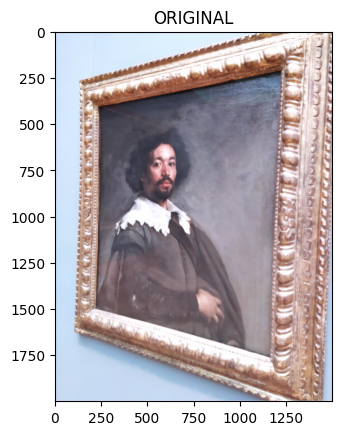

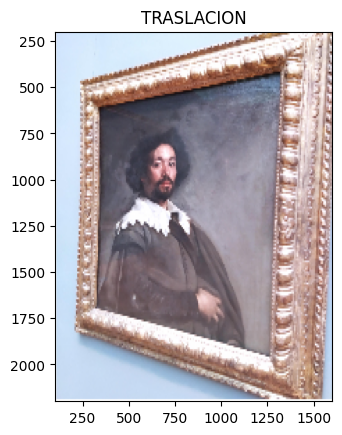

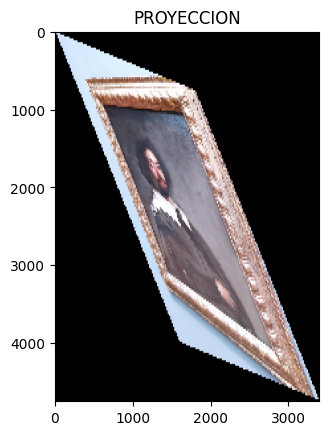

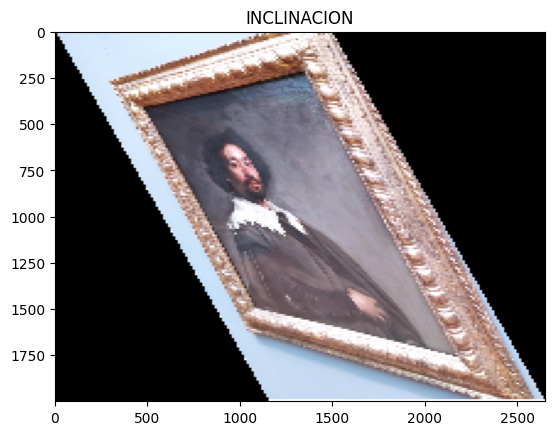

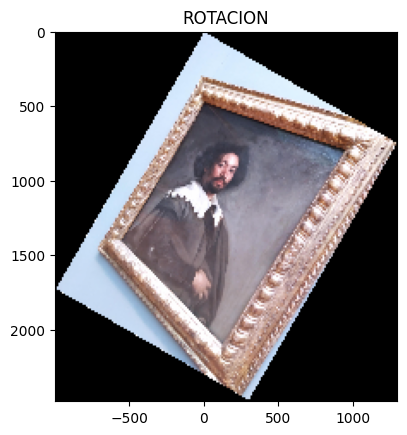

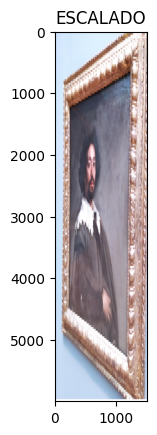

In [16]:
img = skimage.io.imread("pareja.png")
img =img.astype(np.float32)
dx = 100  # traslación en el eje x
dy = 200  # traslación en el eje y
traslacion = np.array([[1, 0, dx],
                   [0, 1, dy],
                   [0, 0, 1]])
img = skimage.io.imread("pareja.png")
warped,extent=transform_image(img, traslacion, 200)
plt.imshow(img)
plt.title("ORIGINAL")
plt.show()  
# Visualizar la imagen transformada
plt.imshow(warped, extent=extent)
plt.title("TRASLACION")
plt.show()
proyeccion= np.array([[1.35, 0.59, 100],
                   [0.32, 2.31, 0],
                   [6.1e-04, 1.3e-03, 1]])
proyeccion = np.array([
    [1.2, 0.8, 0],
    [0.5, 2.0, 0],
    [0.001, 0.002, 1]
])

warped,extent=transform_image(img, proyeccion, 200)
# Visualizar la imagen transformada
plt.imshow(warped, extent=extent)
plt.title("PROYECCION")
plt.show()
# Convertir ángulo a radianes
angulo_radianes = np.deg2rad(30)

# Calcular la tangente del ángulo
tangente = np.tan(angulo_radianes)

# Crear la matriz de transformación de inclinación
inclinacion = np.array([
    [1, tangente, 0],
    [0, 1, 0],
    [0, 0, 1]
])
warped,extent=transform_image(img, inclinacion, 200)
# Visualizar la imagen transformada
plt.imshow(warped, extent=extent)
plt.title("INCLINACION")
plt.show()



# Crear la matriz de transformación de inclinación
# Ángulo de rotación en radianes
angulo_radianes = np.deg2rad(30)

# Matriz de rotación
rotacion = np.array([
    [np.cos(angulo_radianes), -np.sin(angulo_radianes), 0],
    [np.sin(angulo_radianes), np.cos(angulo_radianes), 0],
    [0, 0, 1]
])

warped,extent=transform_image(img, rotacion, 200)
# Visualizar la imagen transformada
plt.imshow(warped, extent=extent)
plt.title("ROTACION")
plt.show()
# Factores de escala
sx = 1  # Escala en dirección x
sy = 3  # Escala en dirección y

# Matriz de escala
escalado = np.array([
    [sx, 0, 0],
    [0, sy, 0],
    [0, 0, 1]
])
warped,extent=transform_image(img, escalado, 200)
# Visualizar la imagen transformada
plt.imshow(warped, extent=extent)
plt.title("ESCALADO")
plt.show()

# Estimación

La estimación de una transformación se realiza comúnmente utilizando métodos de mínimos cuadrados para minimizar la diferencia entre las coordenadas transformadas y las coordenadas reales de los puntos correspondientes.

Como ejemplo, se va a estimar una transformación para obtener una imagen frontal de un cuadro.

In [ ]:
!curl http://www.atc.uniovi.es/grado/3va/prac/pareja.png -o pareja.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2862k  100 2862k    0     0  16.8M      0 --:--:-- --:--:-- --:--:-- 17.3M


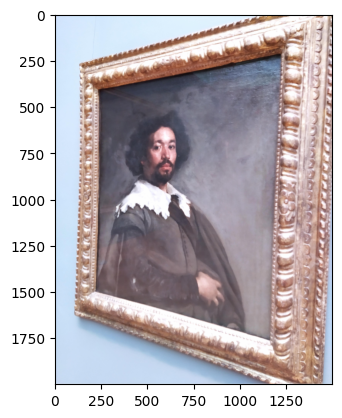

In [9]:
from skimage import io, img_as_float
img = skimage.io.imread("pareja.png")
img = img_as_float(img)
plt.imshow(img)
plt.show()

En este caso, se proporcionan las coordenadas en la imagen en píxeles y las de destino en milímetros.

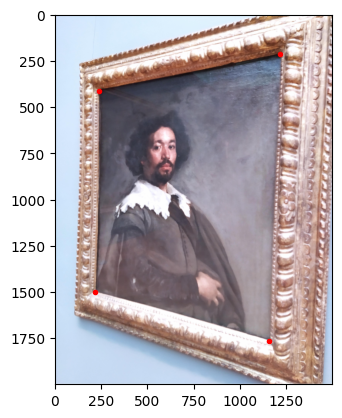

In [10]:
src = np.array(
    [
        [ 240,  218, 1219, 1159],
        [ 410, 1498,  212, 1765]
    ]
)
W = 699
H = 813
dst = np.array(
    [
        [  0,   0, 699, 699],
        [  0, 813,   0, 813]
    ]
)
plt.imshow(img)
plt.plot(src[0,:], src[1,:], '.r')
plt.show()

Para estimar la transformación, dados los puntos en la imagen $(x_i, y_i)$ y sus correspondencias en coordenadas del mundo $(x_i', y_i')$. Se debe resolver el sistema de ecuaciones:

$$
\begin{bmatrix}
x_1 & y_1 & 1 & 0 & 0 & 0 & -x_1' x_1 & -x_1' y_1 & -x'_1 \\
0 & 0 & 0 & x_1 & y_1 & 1 & -y'_1 x_1 & -y'_1 y_1 & -y'_1 \\
x_2 & y_2 & 1 & 0 & 0 & 0 & -x_2' x_2 & -x_2' y_2 & -x'_2 \\
0 & 0 & 0 & x_2 & y_2 & 1 & -y'_2 x_2 & -y'_2 y_2 & -y'_2 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots\\
x_n & y_n & 1 & 0 & 0 & 0 & -x_n' x_n & -x_n' y_n & -x'_n \\
0 & 0 & 0 & x_n & y_n & 1 & -y'_n x_n & -y'_n y_n & -y'_n \\
\end{bmatrix}
\begin{bmatrix}
    h_{11} \\
    h_{12} \\
    h_{13} \\
    h_{21} \\
    h_{22} \\
    h_{23} \\
    h_{31} \\
    h_{32} \\
    h_{33}
\end{bmatrix} = \mathbf{0}
$$

> Para estimar la transformación se deben seguir los siguientes pasos:
>
> Construye la matriz de coeficientes tal y como se muestra en la ecuación anterior usando todos los puntos disponibles.
>
> Utiliza la función `scipy.linalg.svd` para obtener la descomposición de valores singulares de la matriz de coeficientes. La solución es la última fila de $V$: `V[-1, :].reshape(3, 3)`.
>
> Transforma la imagen usando el resultado anterior y verifica el resultado.
>
> Estima la transformación usando `skimage.transform.estimate_transform` y verifica que proporciona los mismos resultados.

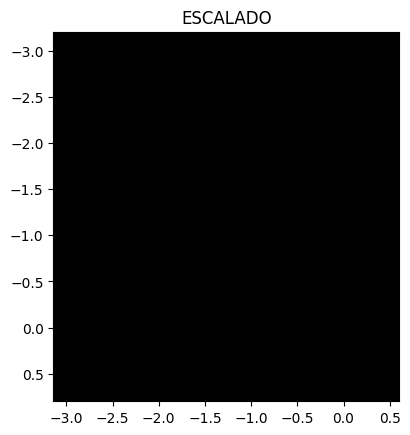

In [17]:
from scipy.linalg import svd
# Construcción de la matriz de coeficientes
num_points = len(src[0])  # Número de puntos disponibles

matriz_coeficientes = np.zeros((2 * num_points, 9))

for i in range(num_points):
    x, y = src[0, i], src[1, i]
    x_, y_ = dst[0, i], dst[1, i]
    
    matriz_coeficientes[2 * i, :] = [x, y, 1, 0, 0, 0, -x_ * x, -x_ * y, -x_]
    matriz_coeficientes[2 * i + 1, :] = [0, 0, 0, x, y, 1, -y_ * x, -y_ * y, -y_]

# Resolución del sistema de ecuaciones usando SVD
_, _, V = svd(matriz_coeficientes)

# Extracción de la solución
homografia_svd = V[-1, :].reshape(3, 3)

warped,extent=transform_image(img, homografia_svd, 200)
# Visualizar la imagen transformada
plt.imshow(warped, extent=extent)
plt.title("ESCALADO")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


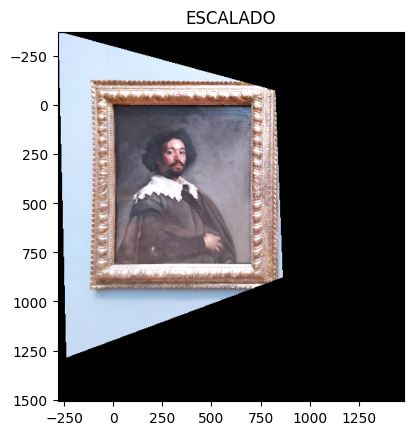

Matriz de transformación estimada usando skimage:
[[ 1.14548619e+00  2.31624046e-02 -2.84413271e+02]
 [ 1.65498977e-01  8.18300496e-01 -3.75222958e+02]
 [ 4.92321689e-04 -1.11556528e-05  1.00000000e+00]]

Matriz de transformación obtenida previamente:
[[-2.43287917e-03 -4.91942480e-05  6.04060643e-01]
 [-3.51500540e-04 -1.73797489e-03  7.96929835e-01]
 [-1.04563389e-06  2.36933065e-08 -2.12388346e-03]]


In [12]:
from skimage.transform import estimate_transform

# Convertir los puntos de correspondencia a un formato aceptable por estimate_transform
src_pts = np.vstack((src[0], src[1])).T
dst_pts = np.vstack((dst[0], dst[1])).T

# Estimar la transformación usando skimage.transform.estimate_transform
transformation = estimate_transform('projective', src_pts, dst_pts)

# Obtener la matriz de transformación estimada
estimated_homography = transformation.params
warped,extent=transform_image(img, estimated_homography, 500)
# Visualizar la imagen transformada
plt.imshow(warped, extent=extent)
plt.title("ESCALADO")
plt.show()
print("Matriz de transformación estimada usando skimage:")
print(estimated_homography)

# Comparar con la matriz de transformación obtenida previamente
print("\nMatriz de transformación obtenida previamente:")
print(homografia_svd)